In [2]:
#google
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#import packages
import os
import tensorflow as tf
import keras
from keras import layers
from keras.models import Model
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, GlobalMaxPooling2D
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet50

Using TensorFlow backend.


In [0]:
#load dataset
train_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/A2/dataset1/train/' #80
valid_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/A2/dataset1/val/' #10
test_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/A2/dataset1/test/' #10

In [0]:
#ImageGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
#datagen flow for multi-class
train_generator = train_datagen.flow_from_directory(train_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
valid_generator = test_datagen.flow_from_directory(valid_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)

Found 900 images belonging to 4 classes.
Found 113 images belonging to 4 classes.
Found 112 images belonging to 4 classes.


In [7]:
#resnet101
model = ResNet50(weights= 'imagenet', include_top=False, input_tensor=None, input_shape=(224,224,3))

94773248/94765736 [==============================] - 7s 0us/step


In [8]:
#adding new layers
x = model.output
x = Flatten()(x)
#add fully connected layer
x = Dense(512,activation = "relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(512,activation = "relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
#add logistic layer
predictions = Dense(4, activation='softmax')(x)
#model to train
model = Model(input=model.input, output=predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
#unfreeze all BatchNormalization layers and freeze all except for last 7 layers
for layer in model.layers[:-7]:
    if "BatchNormalization" in layer.__class__.__name__:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-5), metrics=['acc'])

In [11]:
#train model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=25,
      validation_data=valid_generator,
      validation_steps=10,  
      verbose=1)

Epoch 1/25
100/100 [==============================] - 564s 6s/step - loss: 1.3664 - acc: 0.5138 - val_loss: 1.4005 - val_acc: 0.4250
Epoch 2/25
100/100 [==============================] - 91s 911ms/step - loss: 0.6500 - acc: 0.7513 - val_loss: 2.6521 - val_acc: 0.1781
Epoch 3/25
100/100 [==============================] - 22s 218ms/step - loss: 0.5558 - acc: 0.7929 - val_loss: 1.6744 - val_acc: 0.2877
Epoch 4/25
100/100 [==============================] - 23s 226ms/step - loss: 0.4717 - acc: 0.8375 - val_loss: 2.1961 - val_acc: 0.2625
Epoch 5/25
100/100 [==============================] - 22s 215ms/step - loss: 0.4192 - acc: 0.8480 - val_loss: 2.7898 - val_acc: 0.3425
Epoch 6/25
100/100 [==============================] - 22s 224ms/step - loss: 0.4168 - acc: 0.8593 - val_loss: 4.4301 - val_acc: 0.3973
Epoch 7/25
100/100 [==============================] - 22s 219ms/step - loss: 0.4091 - acc: 0.8598 - val_loss: 1.0218 - val_acc: 0.5125
Epoch 8/25
100/100 [==============================] - 23s

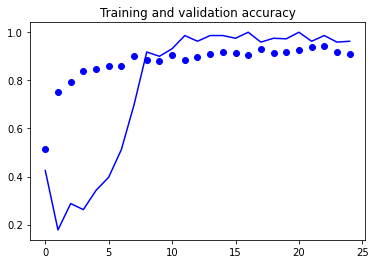

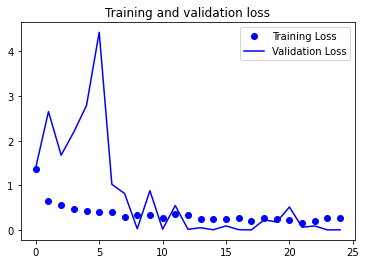

In [12]:
#plot graph
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_generator)
test_acc

14/14 [==============================] - 86s 6s/step


0.9285714030265808